# Machine Learning Online Class - Exercise 3 | Part 2: Neural Networks

In this part of the exercise, we will implement a neural network to recognize handwritten digits using the same training set as before. The neural network will be able to represent complex models that form non-linear hypotheses. For this exercise, we will be using parameters from a already trained neural network.

## Initialize Parameters

Setup the parameters this part of the exercise as follows:

In [1]:
input_layer_size = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25  # 25 hidden units
num_labels = 10         # 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)

## Part 1: Loading and Visualizing Data

Load the data from the Matlab .mat files:

In [2]:
import numpy as np
import scipy.io as sio


mat_data = sio.loadmat('ex3data1.mat')
x = mat_data['X']
y = mat_data['y']
m, n = x.shape

Randomly select 100 data points to display:

In [3]:
rand_indices = np.random.permutation(m)
sel = x[rand_indices[0:100], :]

The `display_data` function below will help to visualize the data in a nice grid.

In [4]:
import matplotlib.pyplot as plt


def format_tile(x, width=-1, padding=0):
    """
    Format raw data to a 2-d array for plot.

    Parameters
    ----------
    x : ndarray
        Raw data, 1-d array.
    width : int
        Width of the image.
    padding : int
        Padding around the image.

    Returns
    -------
    ndarray
        The formatted 2-d array data for plot.
    """
    if width < 0:
        width = int(np.round(np.sqrt(len(x))))
    height = len(x) / width

    tile = np.ones((height + padding * 2, width + padding * 2))

    for i in range(padding, height + padding):
        tile[i, padding:(padding + width)] = x[((i - padding) * width):((i - padding) * width + width)]

    return tile


def display_data(x, tile_width=-1, padding=0, show=False):
    """
    Display data in a nice grid

    Parameters
    ----------
    x : ndarray
        Raw data.
    tile_width : int
        Width of each image.
    padding : int
        Padding around the image.
    show : bool
        True to show the plot immediately.
    """
    m, n = x.shape

    if tile_width < 0:
        tile_width = int(np.round(np.sqrt(n)))
    tile_height = n / tile_width

    display_rows = int(np.floor(np.sqrt(m)))
    display_columns = int(np.ceil(m / display_rows))

    tile_height_padded = tile_height + padding * 2
    tile_width_padded = tile_width + padding * 2
    data = np.zeros((display_rows * tile_height_padded, display_columns * tile_width_padded))

    for i in range(display_rows):
        for j in range(display_columns):
            tile = format_tile(x[i * display_rows + j, ], tile_width, padding)
            tile = tile.T
            data[i * tile_height_padded:(i + 1) * tile_height_padded,
                 j * tile_width_padded:(j + 1) * tile_width_padded] = tile

    plt.imshow(data, cmap='gray', extent=[0, 1, 0, 1])

    if show:
        plt.show()

Display the images: 

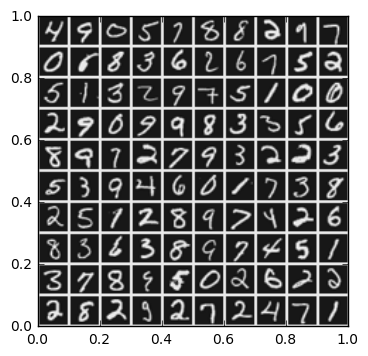

In [5]:
display_data(sel, padding=1, show=True)

## Part 2: Loading Parameters 

Load saved neural network parameters:

In [6]:
mat_param = sio.loadmat('ex3weights.mat')
theta_1 = mat_param['Theta1']
theta_2 = mat_param['Theta2']

## Part 3: Implement Predict

The `predict` function below predicts the label of an input given a trained neural network.

In [7]:
import numpy as np


def sigmoid(z):
    """
    Compute sigmoid function.

    Parameters
    ----------
    z : array_like
        Variable for sigmoid function.

    Returns
    -------
    ndarray
        The sigmoid of each value of z.
    """
    g = 1 / (1 + np.exp(-z))
    return g


def predict(theta_1, theta_2, x):
    """
    Predict the label of an input given a trained neural network.

    Parameters
    ----------
    theta_1 : ndarray
        Trained weights of layer 1 of the neural network.
    theta_2 : ndarray
        Trained weights of layer 2 of the neural network.
    x : ndarray
        Training data, m by n matrix where m is the number of data samples.

    Returns
    -------
    p : ndarray
         The prediction for x, which is an m by 1 array.
    """

    m, n = x.shape
    x = np.hstack((np.ones((m, 1)), x))
    a_1 = sigmoid(x.dot(theta_1.T))
    a_1 = np.hstack((np.ones((m, 1)), a_1))
    a_2 = sigmoid(a_1.dot(theta_2.T))

    p = np.argmax(a_2, axis=1)
    p += 1  # The theta_1 and theta_2 are loaded from Matlab data, in which the matrix index starts from 1.

    return p.reshape(m, 1)


The accuracy on training set:

In [8]:
pred = predict(theta_1, theta_2, x)
print 'Training Set Accuracy:', np.mean(pred == y) * 100

Training Set Accuracy: 97.52


Finally, we randomly select 5 samples to predict on at a time and to see what it is predicting.

Displaying Example Image
Neural Network Prediction: [[1]] (digit [[1]])


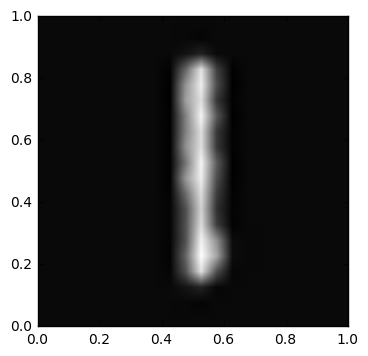

Displaying Example Image
Neural Network Prediction: [[7]] (digit [[7]])


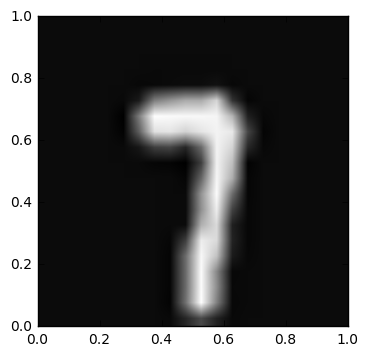

Displaying Example Image
Neural Network Prediction: [[2]] (digit [[2]])


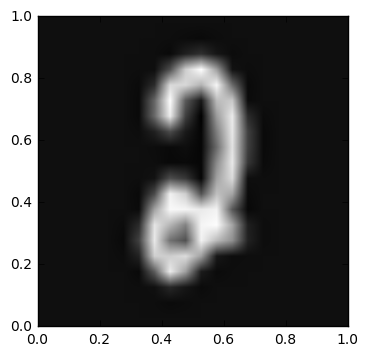

Displaying Example Image
Neural Network Prediction: [[5]] (digit [[5]])


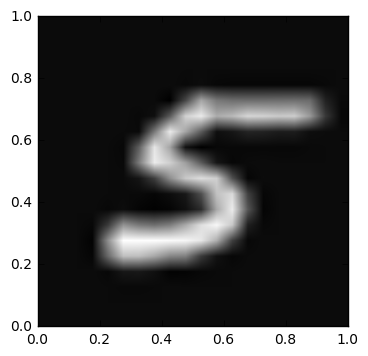

Displaying Example Image
Neural Network Prediction: [[7]] (digit [[7]])


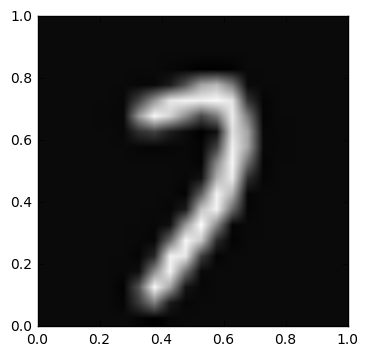

In [9]:
rp = np.random.permutation(m)
for i in range(5):
    print 'Displaying Example Image'
    display_data(x[rp[i], ].reshape(1, n))
    pred = predict(theta_1, theta_2, x[rp[i], ].reshape(1, n))
    print 'Neural Network Prediction: {} (digit {})'.format(pred, pred % 10)
    plt.show()